<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=b0b8767c3c886a4baa8b89682edf83e392ba09b3a24615becc1ad968f5cd3c2a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=3, average='micro', threshold=0.5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 16.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add( Dense(10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

In [16]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 60)                5100      
                                                                 
 dense_8 (Dense)             (None, 10)                610       
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 5,743
Trainable params: 5,743
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 580, epochs = 3000,  validation_split=0.2)

Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 5ms/step - loss: 0.9176 - accuracy: 0.5325 - val_loss: 1.4492 - val_accuracy: 0.3158
Epoch 502/3000
34/34 [==============================] - 0s 4ms/step - loss: 0.9180 - accuracy: 0.5297 - val_loss: 1.6436 - val_accuracy: 0.2282
Epoch 503/3000
34/34 [==============================] - 0s 3ms/step - loss: 0.9195 - accuracy: 0.5291 - val_loss: 1.3727 - val_accuracy: 0.3437
Epoch 504/3000
34/34 [==============================] - 0s 3ms/step - loss: 0.9188 - accuracy: 0.5339 - val_loss: 1.4993 - val_accuracy: 0.3062
Epoch 505/3000
34/34 [==============================] - 0s 4ms/step - loss: 0.9177 - accuracy: 0.5333 - val_loss: 1.4057 - val_accuracy: 0.3460
Epoch 506/3000
34/34 [==============================] - 0s 3ms/step - loss: 0.9180 - accuracy: 0.5355 - val_loss: 1.4974 - val_accuracy: 0.2994
Epoch 507/3000
34/34 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.530

In [19]:
import matplotlib.pyplot as plt

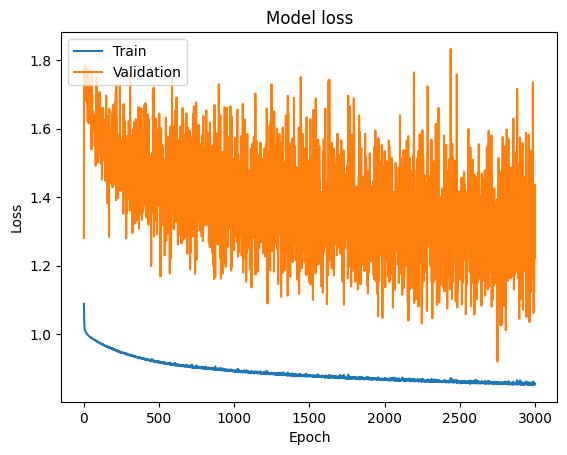

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

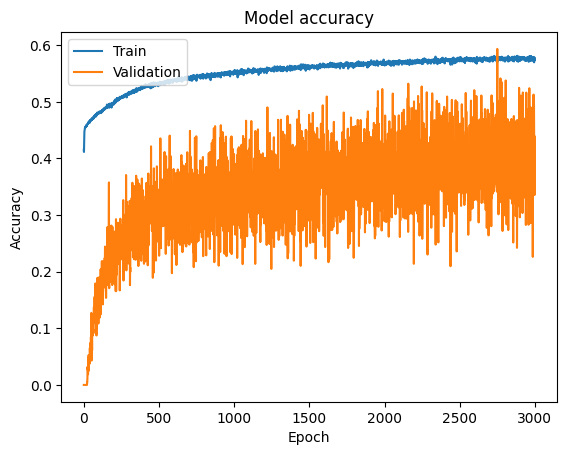

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 1ms/step - loss: 1.1405 - accuracy: 0.4240
[1.1405272483825684, 0.4239521026611328]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.53      0.54      0.53      2042
     class 1       0.29      0.34      0.31      1327
     class 2       0.40      0.28      0.33       806

    accuracy                           0.42      4175
   macro avg       0.41      0.39      0.39      4175
weighted avg       0.43      0.42      0.42      4175



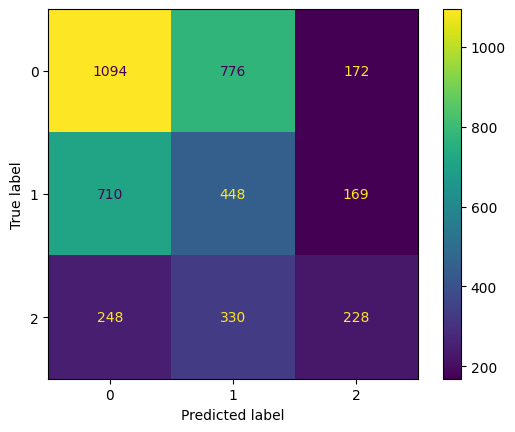



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 1ms/step - loss: 0.9208 - accuracy: 0.5538
[0.9207940697669983, 0.5538135170936584]
766/766 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.50      0.64      0.56      8164
     class 1       0.50      0.58      0.54      8164
     class 2       0.79      0.44      0.57      8164

    accuracy                           0.55     24492
   macro avg       0.60      0.55      0.55     24492
weighted avg       0.60      0.55      0.55     24492



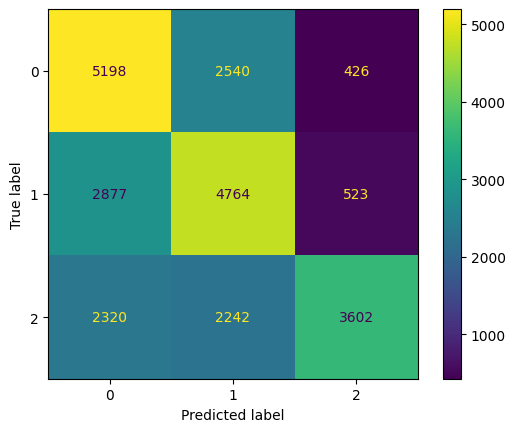

In [22]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 1ms/step - loss: 1.1405 - accuracy: 0.4240
